Alexander Hyde <br>
Phys 434 AB <br>
Partner: Max Wang <br>
# Lab 1

This lab will take a look at three different probability distributions, the Normal, Chi Squared, and Poisson. With each of these, I'll be calculating probabilities that I'll convert to a Sigma metric, which I'll explain later.

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import special

# Normal Distribution

The most basic of these distributions is the Normal distribution, which takes the shape of a Gaussian function. To start, I'll plot a Normal distribution with a mean of 0 and a standard deviation of 1, and a histogram of 100k random samples taken based off of this distribution. <br> <br>
Also note that most plots in this lab will be shown with the y-axis on a logarithmic scale.

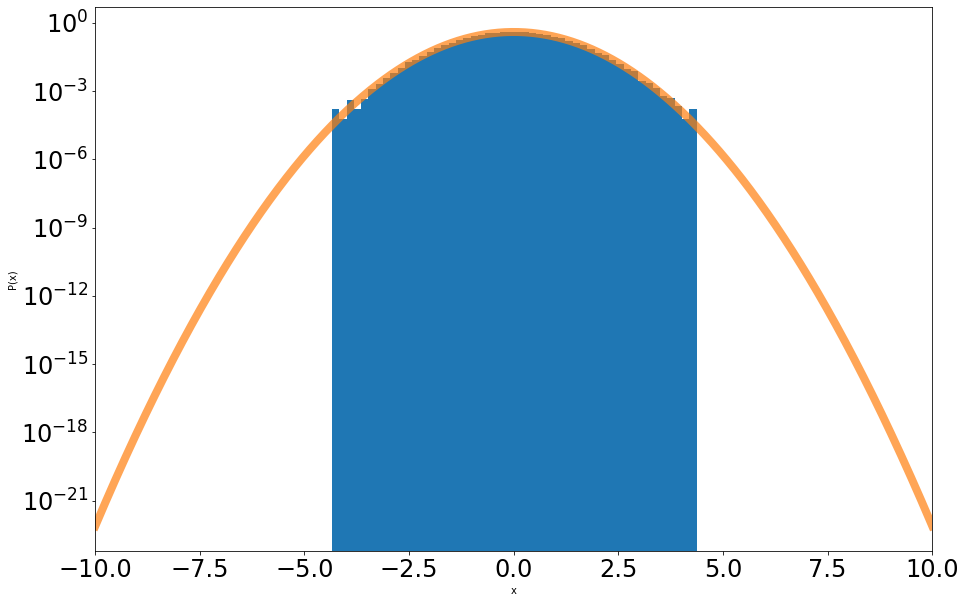

In [4]:
plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1, 1)
d = stats.norm.rvs(0,1,100000)
plt.tick_params(labelsize = 24)
plt.xlim([-10,10])
plt.yscale("log")
plt.ylabel("P(x)")
plt.xlabel("x")
x = np.linspace(-10,10,1000)
plt.hist(d,50,density=True)
plt.plot(x,stats.norm.pdf(x,loc = 0., scale = 1),linewidth = 8,alpha = 0.7)
plt.show()

Notice how the samples tend to deviate near the edges of the histogram, which is a sign of the
'signal data' becoming background noise. The probability that a certain signal, let's say one
of the samples occuring at a certain x, is background noise, can be calculated based on integrals
of the probability density function (pdf). <br> <br>

First, I'll just demonstrate how normal integrals are done with the Normal distribution. Here I'll
simply integrate from 0 to three different x values using the norm.cdf command. Keep in mind that
integrating a probability density will yield a net probability.

In [14]:
for x in [1,2,5]:
    prob = stats.norm.cdf(x,0,1) - 0.5
    print("X: " + str(x) + ", X Prob.: " + str(prob))

X: 1, X Prob.: 0.3413447460685429
X: 2, X Prob.: 0.4772498680518208
X: 5, X Prob.: 0.4999997133484281


It's important to note that the indefinite integral of the Normal distribution is the error function,
which evaluates to 0.5 at x = 0, which is why I subtract 0.5 since x = 0 is the lower bound of my
definite integrals. As a result, I end up with probabilities that get close, but not quite to 0.5 as
x increases. <br> <br>

Now, one question I'm going to ask a lot is whether or not a signal from a random distribution came from the background noise. To answer this, I'll integrate from x to infinity over the pdf.
Upon doing the math, the upper bound at infinity evaluates to 1 since the Normal distribution
is normalized to 1. The lower bound is the indefinite integral, which is norm.cdf in Scipy terms.
This results in the probability being $prob = 1 - stats.norm.cdf$: <br> <br>

Another calculation I'm going to make is inverting the probability back into the respective x it was
taken from, this will also be known as the Sigma of the probability (note that Sigma only refers to Gaussians). To do this, a tiny bit of algebra
is used, taking $prob = 1 - stats.norm.cdf(x)$, and turning that into $stats.norm.cdf(x) = 1 - prob$, and
then using cdf's inverse function, ppf, to invert the equation into $x = stats.norm.ppf(1 - prob)$.

In [39]:
for x in [-1,0.1,1,2,5]:
    prob = 1 - stats.norm.cdf(x,0,1)
    sigma = stats.norm.ppf(1 - prob,0,1)
    print("X: " + str(x) + ", Signal Prob: " + str(prob) + ", Sigma: " + str(sigma))

X: -1, Signal Prob: 0.8413447460685429, Sigma: -1.0
X: 0.1, Signal Prob: 0.460172162722971, Sigma: 0.10000000000000002
X: 1, Signal Prob: 0.15865525393145707, Sigma: 1.0
X: 2, Signal Prob: 0.02275013194817921, Sigma: 2.0000000000000004
X: 5, Signal Prob: 2.866515719235352e-07, Sigma: 4.999999999970176


As you can see, the probability that signals at each of these x locations are background noise gets diminished
quickly as x gets more positive.
Also, I included a point x = -1 since the another half of the Gaussian is on the left side of its mean.
This got a larger probability in turn, which demonstrates the more negative a Sigma value is, the greater
the probability it's associated to.
From now on, I'll also use $Sigma = stats.norm.ppf(1 - prob)$ to convert other probabilities in the future
to this Normal metric. 

# Chi Squared Distribution

Now for a different probability distribution, I'll look at Chi Squared.
The Chi Squared distribution function has one major parameter, df, which is the distribution's
degrees of freedom. Practically speaking, people use Chi Squared itself to optimize a line-fit,
but its pdf has other uses as well.
Here I'll plot three different Chi Squared pdf's, the difference being the df values.

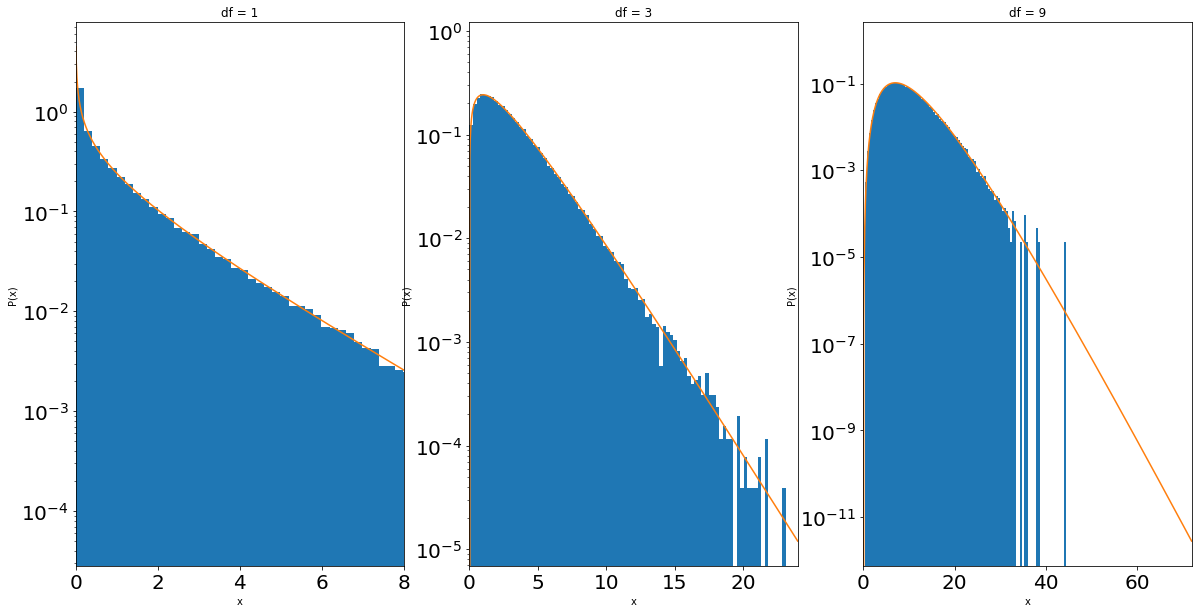

In [37]:
plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots(1, 3)
df = [1,3,9]
for i in [0,1,2]:
    plt.subplot(1,3,i+1)
    d = stats.chi2.rvs(df[i],0,1,100000)
    plt.hist(d,100,density=True)
    plt.tick_params(labelsize = 20)
    x = np.linspace(0,8*df[i],1000)
    plt.xlim([0,8*df[i]])
    plt.yscale("log")
    plt.ylabel("P(x)")
    plt.xlabel("x")
    plt.title("df = " + str(df[i]))
    plt.plot(x,stats.chi2.pdf(x,df[i],0,1),8,0.7)

plt.show()

As you can see from the plots, the concavity at x = 0 changes from up to down as df goes from 1 to 3.
Another key detail is that as df goes from 3 to 9, the plot gets shorter and wider.
From now on I'm going to use the df = 9 plot on the right in my calculations.

Here I'll calculate the probability that the signal at certain x values in this pdf comes from the background. This is again taken as the integral from x to infinity.
I'll also calculate the respective Sigma value based on the previous Normal distribution ppf.

In [41]:
x = [2,4,6,8,10,15,20,25,50]
for i in x:
    prob = 1 - stats.chi2.cdf(i,9,0,1)
    sigma = stats.norm.ppf(1 - prob,0,1)
    print("X: " + str(i) + ", Signal Prob: " + str(prob) + ", Sigma: " + str(sigma))

X: 2, Signal Prob: 0.9914676066288135, Sigma: -2.3853088788552834
X: 4, Signal Prob: 0.9114125268316792, Sigma: -1.3495045921559632
X: 6, Signal Prob: 0.7399182920946538, Sigma: -0.6430935248515914
X: 8, Signal Prob: 0.5341462169096916, Sigma: -0.0856966488242993
X: 10, Signal Prob: 0.3504852123233613, Sigma: 0.3840108245354407
X: 15, Signal Prob: 0.09093597657980512, Sigma: 1.3350134232918254
X: 20, Signal Prob: 0.01791240452984333, Sigma: 2.0989102961306623
X: 25, Signal Prob: 0.0029711804859176016, Sigma: 2.7509450540524973
X: 50, Signal Prob: 1.07723820197414e-07, Sigma: 5.185490006822474


Notice how until the x values cross the peak of the df = 9 plot, the signal strength is
clearly strong with probabilities above 0.5. You can see that the background noise quickly
takes over both visibly in the plot and in the calculated probabilities as well.

# Poisson Distribution

Another probability distribution I'll tackle is the Poisson distribution.
The Poisson distribution models the probability of an event happening x amount of times
as a function of x. Since a fraction of an event can't happen, x must be an integer, making
the Poisson distribution a function of discrete probabilities. <br> <br>

Here, I'll plot out three Poisson distributions with 100k samples to go with each of them.
It's important to note that while the probability mass function (pmf) is a probability of x
events happening, the sample data reflects the number of times x events happened. I'll
refer to the samples on the y-axis as 'sample counts' in the future.
With each of these plots, I'll assign a different Mu parameter to them to adjust their shapes.

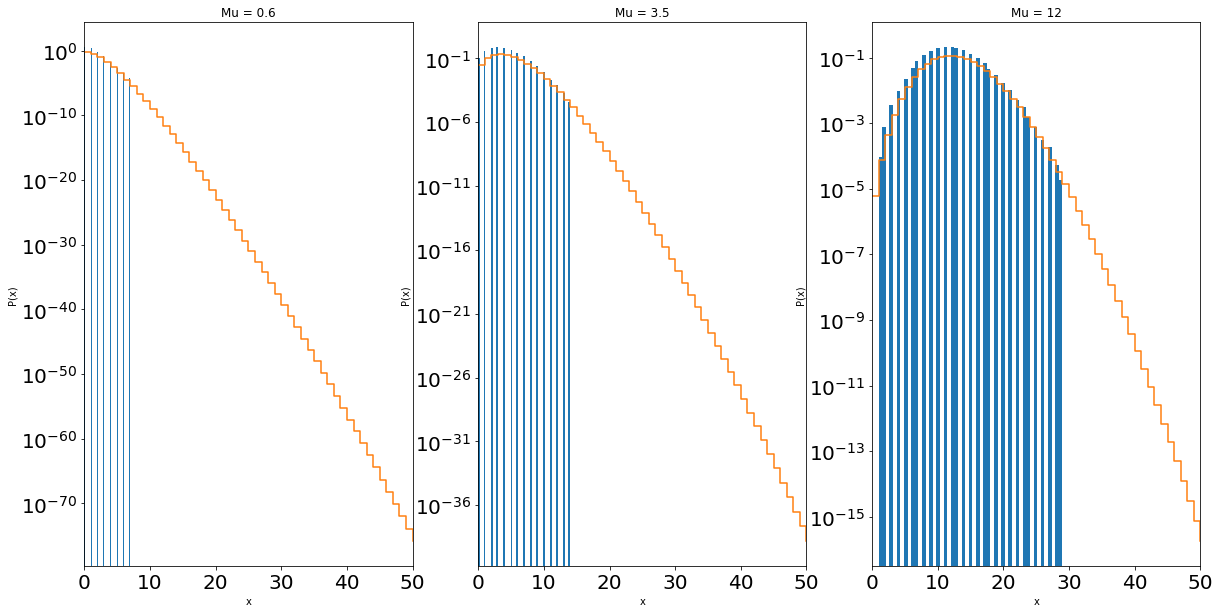

In [21]:
fig, ax = plt.subplots(1,3)
x = np.linspace(0,50,51)

mu = [0.6,3.5,12]
for i in [0,1,2]:
    plt.subplot(1,3,i+1)
    d = stats.poisson.rvs(mu[i],0,100000)
    plt.xlim([0,50])
    plt.yscale("log")
    plt.tick_params(labelsize = 20)
    plt.title("Mu = " + str(mu[i]))
    plt.ylabel("P(x)")
    plt.xlabel("x")
    plt.hist(d,51,density=True)
    plt.step(x,stats.poisson.pmf(x,mu[i]),where="post")

plt.show()

In each of these three plots, Mu is both the mean and the standard deviation.
Notice how this is reflected in the peaks of the graphs being over Mu on the x-axis,
and how the distance from the origin to the $P(x) = 10^{-10}$ point gets wider as Mu gets larger. <br> <br>

Next I'll apply the same signal calculations to the Mu = 12 Poisson distribution as I did
for the Chi Squared one.
In this case, I'm calculating what the probability is that the sample counts of each of
these x numbers of events is a result of background noise.

In [42]:
x = [1,1.5,2,3,4,5,10,15,20,25]
for i in x:
    prob = 1 - stats.poisson.cdf(i,12)
    sigma = stats.norm.ppf(1 - prob,0,1)
    print("X: " + str(i) + ", Signal Prob: " + str(prob) + ", Sigma: " + str(sigma))

X: 1, Signal Prob: 0.9999201252394068, Sigma: -3.7754024694566692
X: 1.5, Signal Prob: 0.9999201252394068, Sigma: -3.7754024694566692
X: 2, Signal Prob: 0.9994777419499671, Sigma: -3.2782533292208647
X: 3, Signal Prob: 0.9977082087922086, Sigma: -2.83492932747975
X: 4, Signal Prob: 0.992399609318933, Sigma: -2.4275597831792877
X: 5, Signal Prob: 0.9796589705830716, Sigma: -2.0467558877755536
X: 10, Signal Prob: 0.6527705824458281, Sigma: -0.39281133098258153
X: 15, Signal Prob: 0.15558434754981676, Sigma: 1.0127728011006507
X: 20, Signal Prob: 0.011597737214807502, Sigma: 2.270199613905547
X: 25, Signal Prob: 0.00030775513054281944, Sigma: 3.424686042091412


It's worth noting that since only an integer number of samples can be evaluated for an integer number
of events, the calculated probabilities and sigmas are discrete. As a result of this, Scipy correctly
evaluates the same probability and sigma for x = 1.5 as it does for x = 1. <br> <br>

Keep in mind that even though the number of x events are discrete integers, the mean Mu itself
doesn't have to be, as you can see in the Mu = 0.6 or Mu = 3.5 plots. This is because the mean is
taken as an average of the events.
If two samples run 1 event and three samples run 2 events, the mean number of events Mu 
between these five samples is $x = (1*2 + 2*3)/5 = 1.6$, even though you can't have 1.6 events happen.
The same logic applies to Mu in the case of these plots.
Ultimately, any value directly measured off of the Poisson functions must be discrete, such
as the probability of x events occurring. Any value calculated based on these measurements however,
such as the mean or the standard deviation, isn't necessarily an integer.